# Plot scan

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from itertools import product
import seaborn as sns
import sys
sys.path.append('../')
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
#Load scan data
pclFile = './hs_test_highMC/Events/run_01/hs_16_tau_3.00e-03_atlas_2018_13.pcl'
pclFile = './hs_combined.pcl'
dataDF = pd.read_pickle(pclFile)
# Round lifetimes
dataDF['tau_ns'] = dataDF['tau_ns'].apply(lambda x: round(x, 3 - int(np.floor(np.log10(abs(x))))))
# print(dataDF.columns.values.tolist()) #Print all columns names

In [3]:
dataDF.T

,0,1,2,3,4,5,6,7,8,9,10,11
Luminosity (1/fb),139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0
SR,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless
$N_s$,0.5487,0.04697,0.003729,0.000319,0.0,0.0,0.0,0.0,0.712,0.06095,0.2573,0.02203
$N_s$ Err,0.3168,0.02712,0.002153,0.000184,0.0,0.0,0.0,0.0,0.4111,0.03519,0.1486,0.01272
AccEff,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.0,0.000001,0.0
AccEffErr,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.0,0.0,0.0
Total,"(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)","(487100.0, 1.0)"
Total Error,"(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)","(1258.0, 0.0)"
Jet selection,"(19.49, 4e-05)","(409.2, 0.00084)","(19.49, 4e-05)","(389.7, 0.0008)","(19.49, 4e-05)","(409.2, 0.00084)","(19.49, 4e-05)","(409.2, 0.00084)","(19.49, 4e-05)","(409.2, 0.00084)","(19.49, 4e-05)","(409.2, 0.00084)"
Jet selection Error,"(7.955, 1.633e-05)","(36.45, 7.483e-05)","(7.955, 1.633e-05)","(35.58, 7.303e-05)","(7.955, 1.633e-05)","(36.45, 7.483e-05)","(7.955, 1.633e-05)","(36.45, 7.483e-05)","(7.955, 1.633e-05)","(36.45, 7.483e-05)","(7.955, 1.633e-05)","(36.45, 7.483e-05)"


### Compute UL on BR assuming SM higgs production cross-section

In [4]:
xsecHiggs = 48.5
dataDF['BR_UL'] = 1.0/(dataDF['robs']*(xsecHiggs/(dataDF['Total xsec (pb)']*dataDF['BR25_35_35'])))

### Define colors and plotting order

In [5]:
colors = sns.color_palette("Paired",10)
colorsPink = sns.color_palette("colorblind",8)
colorDict = {'HighPT' : colorsPink[4], #light pink
             'Trackless' : colors[4] }
srs = {'HighPT' : dataDF[(dataDF['SR'] == 'HighPT')], 'Trackless' : dataDF[(dataDF['SR'] == 'Trackless')]}


### Plot excluded points grouped by most excluding analysis

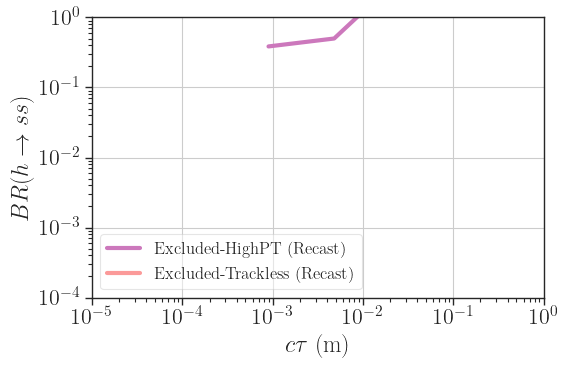

In [6]:

plt.figure(figsize=(6,4))
n = 0
for sr,data in srs.items():
    x = np.array(data['tau_ns']*3e8*1e-9)
    y = np.array(data['BR_UL'])
    y = y[np.argsort(x)]
    x = x[np.argsort(x)]
    color = colorDict[sr]
    # plt.scatter(x,y,color=color,label=sr,s=50)
    plt.plot(x,y,color=color,label='Excluded-%s (Recast)' %sr,linewidth=3.0)

lgd = plt.legend(framealpha=0.5,fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$c \tau$ (m)')
plt.ylabel(r'$BR(h \to s s)$')
plt.tight_layout()
plt.xlim(1e-5,1)
plt.ylim(1e-4,1)
# plt.ylim(0,3000)
plt.grid()
plt.tight_layout()
# plt.savefig('recast_Fig11.png')
plt.show()

In [7]:
dd = dataDF[dataDF['tau_ns'] == 3e-3]
dd.T

,8,9
Luminosity (1/fb),139.0,139.0
SR,HighPT,Trackless
$N_s$,0.712,0.06095
$N_s$ Err,0.4111,0.03519
AccEff,0.000001,0.0
AccEffErr,0.000001,0.0
Total,"(487100.0, 1.0)","(487100.0, 1.0)"
Total Error,"(1258.0, 0.0)","(1258.0, 0.0)"
Jet selection,"(19.49, 4e-05)","(409.2, 0.00084)"
Jet selection Error,"(7.955, 1.633e-05)","(36.45, 7.483e-05)"
